In [ ]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time
from datetime import datetime

In [ ]:
weather_api_key= "40bf648275392d294c604d3f8f57d8ff"

In [38]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40bf648275392d294c604d3f8f57d8ff


In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
print(len(cities))

605


In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santarem
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | brumado
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | virginia beach
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | geraldton
Processing Record 12 of Set 1 | ballina
Processing Record 13 of Set 1 | nainpur
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | gwanda
Processing Record 16 of Set 1 | toliary
City not found. Skipping...
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | port macquarie
Processing Record 20 of Set 1 | saldanha
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | 

Processing Record 39 of Set 4 | mount isa
Processing Record 40 of Set 4 | abapo
Processing Record 41 of Set 4 | meyungs
City not found. Skipping...
Processing Record 42 of Set 4 | ixtapa
Processing Record 43 of Set 4 | fukue
Processing Record 44 of Set 4 | vinh yen
Processing Record 45 of Set 4 | bambous virieux
Processing Record 46 of Set 4 | coihaique
Processing Record 47 of Set 4 | balkhash
Processing Record 48 of Set 4 | qaqortoq
Processing Record 49 of Set 4 | tautira
Processing Record 50 of Set 4 | laramie
Processing Record 1 of Set 5 | rio grande
Processing Record 2 of Set 5 | sorland
Processing Record 3 of Set 5 | teahupoo
Processing Record 4 of Set 5 | pisco
Processing Record 5 of Set 5 | loralai
Processing Record 6 of Set 5 | bom jardim
Processing Record 7 of Set 5 | tecoanapa
Processing Record 8 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 9 of Set 5 | dunedin
Processing Record 10 of Set 5 | anzoategui
Processing Record 11 of Set 5 | sikonge
Processing R

Processing Record 28 of Set 8 | markova
Processing Record 29 of Set 8 | alugan
Processing Record 30 of Set 8 | yinchuan
Processing Record 31 of Set 8 | russell
Processing Record 32 of Set 8 | asau
Processing Record 33 of Set 8 | dori
Processing Record 34 of Set 8 | polunochnoye
Processing Record 35 of Set 8 | san quintin
Processing Record 36 of Set 8 | abalak
Processing Record 37 of Set 8 | lompoc
Processing Record 38 of Set 8 | edemissen
Processing Record 39 of Set 8 | trapani
Processing Record 40 of Set 8 | fare
Processing Record 41 of Set 8 | riyadh
Processing Record 42 of Set 8 | bercel
Processing Record 43 of Set 8 | mount gambier
Processing Record 44 of Set 8 | aksu
Processing Record 45 of Set 8 | grand centre
City not found. Skipping...
Processing Record 46 of Set 8 | bombay
Processing Record 47 of Set 8 | baruun-urt
Processing Record 48 of Set 8 | huilong
Processing Record 49 of Set 8 | nicoya
Processing Record 50 of Set 8 | port lincoln
Processing Record 1 of Set 9 | kankon
Pr

Processing Record 18 of Set 12 | sao jose da coroa grande
Processing Record 19 of Set 12 | okha
Processing Record 20 of Set 12 | muli
Processing Record 21 of Set 12 | kars
Processing Record 22 of Set 12 | hambantota
Processing Record 23 of Set 12 | moncton
Processing Record 24 of Set 12 | erzin
Processing Record 25 of Set 12 | sept-iles
Processing Record 26 of Set 12 | ambilobe
Processing Record 27 of Set 12 | yongchang
Processing Record 28 of Set 12 | taitung
Processing Record 29 of Set 12 | broome
Processing Record 30 of Set 12 | tawnat
City not found. Skipping...
Processing Record 31 of Set 12 | tairua
Processing Record 32 of Set 12 | sanming
Processing Record 33 of Set 12 | zapolyarnyy
Processing Record 34 of Set 12 | tazovskiy
Processing Record 35 of Set 12 | shatki
Processing Record 36 of Set 12 | uk
City not found. Skipping...
Processing Record 37 of Set 12 | mocuba
Processing Record 38 of Set 12 | linxi
Processing Record 39 of Set 12 | shepsi
Processing Record 40 of Set 12 | mo

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santarem,-2.4431,-54.7083,77.13,94,0,1.14,BR,2022-11-28 00:15:03
1,Qaanaaq,77.4840,-69.3632,-9.89,72,33,6.58,GL,2022-11-28 00:16:16
2,Arraial Do Cabo,-22.9661,-42.0278,73.38,91,93,20.29,BR,2022-11-28 00:15:03
3,Brumado,-14.2036,-41.6653,70.95,88,94,1.57,BR,2022-11-28 00:22:53
4,Punta Arenas,-53.1500,-70.9167,60.91,39,0,3.44,CL,2022-11-28 00:21:09
5,Chokurdakh,70.6333,147.9167,-41.44,100,90,1.54,RU,2022-11-28 00:22:54
6,Virginia Beach,36.8529,-75.9780,71.02,83,75,12.66,US,2022-11-28 00:19:17
7,Hobart,-42.8794,147.3294,62.46,48,40,24.16,AU,2022-11-28 00:22:54
8,Tuktoyaktuk,69.4541,-133.0374,-25.60,75,75,6.91,CA,2022-11-28 00:22:55
9,Ribeira Grande,38.5167,-28.7000,66.78,93,100,20.00,PT,2022-11-28 00:22:55


In [20]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Santarem,BR,2022-11-28 00:15:03,-2.4431,-54.7083,77.13,94,0,1.14
1,Qaanaaq,GL,2022-11-28 00:16:16,77.4840,-69.3632,-9.89,72,33,6.58
2,Arraial Do Cabo,BR,2022-11-28 00:15:03,-22.9661,-42.0278,73.38,91,93,20.29
3,Brumado,BR,2022-11-28 00:22:53,-14.2036,-41.6653,70.95,88,94,1.57
4,Punta Arenas,CL,2022-11-28 00:21:09,-53.1500,-70.9167,60.91,39,0,3.44


In [27]:
# Create the output file (CSV).
output_data_file = "C:\\Users\\casey\\OneDrive\\Desktop\\Course Work\\World Weather Analysis\\weather_data.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
len(city_data)

561

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
# today = time.time()
# today

In [30]:
# # get today's time in seconds
today = time.strftime("%x")
today

'11/27/22'

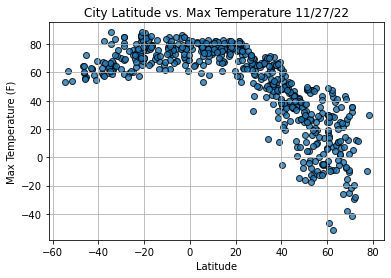

In [31]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

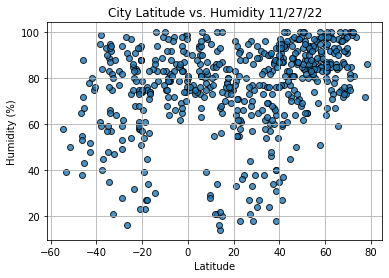

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

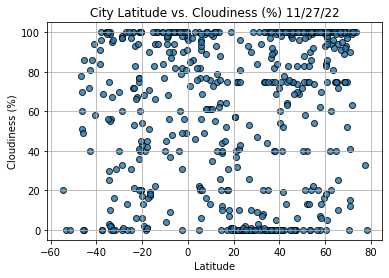

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

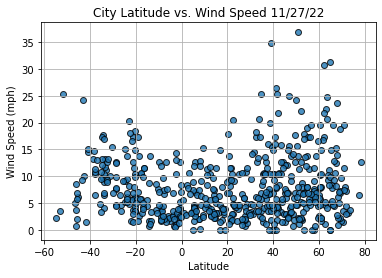

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [44]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [47]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [48]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [49]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

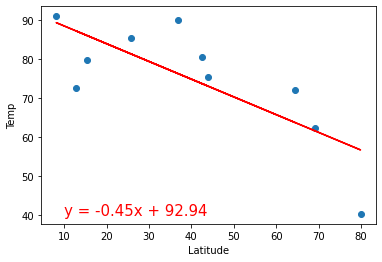

In [50]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [55]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
# Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [56]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Qaanaaq,GL,2022-11-28 00:16:16,77.4840,-69.3632,-9.89,72,33,6.58
5,Chokurdakh,RU,2022-11-28 00:22:54,70.6333,147.9167,-41.44,100,90,1.54
6,Virginia Beach,US,2022-11-28 00:19:17,36.8529,-75.9780,71.02,83,75,12.66
8,Tuktoyaktuk,CA,2022-11-28 00:22:55,69.4541,-133.0374,-25.60,75,75,6.91
9,Ribeira Grande,PT,2022-11-28 00:22:55,38.5167,-28.7000,66.78,93,100,20.00
...,...,...,...,...,...,...,...,...,...
554,Qiyang,CN,2022-11-28 00:26:12,26.5911,111.8474,72.27,90,26,1.97
555,Chusovoy,RU,2022-11-28 00:26:12,58.3013,57.8131,2.35,98,70,0.78
556,Kangaba,ML,2022-11-28 00:26:13,11.9333,-8.4167,74.68,21,100,3.51
558,Mnogovershinnyy,RU,2022-11-28 00:26:13,53.9353,139.9242,8.02,88,86,13.51


In [57]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Qaanaaq,GL,2022-11-28 00:16:16,77.4840,-69.3632,-9.89,72,33,6.58
5,Chokurdakh,RU,2022-11-28 00:22:54,70.6333,147.9167,-41.44,100,90,1.54
6,Virginia Beach,US,2022-11-28 00:19:17,36.8529,-75.9780,71.02,83,75,12.66
8,Tuktoyaktuk,CA,2022-11-28 00:22:55,69.4541,-133.0374,-25.60,75,75,6.91
9,Ribeira Grande,PT,2022-11-28 00:22:55,38.5167,-28.7000,66.78,93,100,20.00


In [58]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

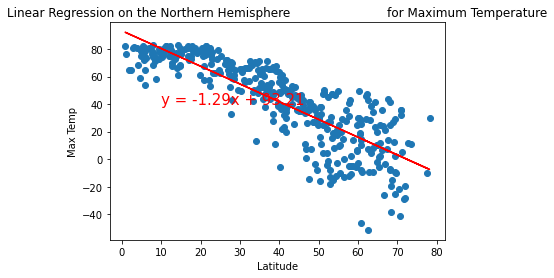

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

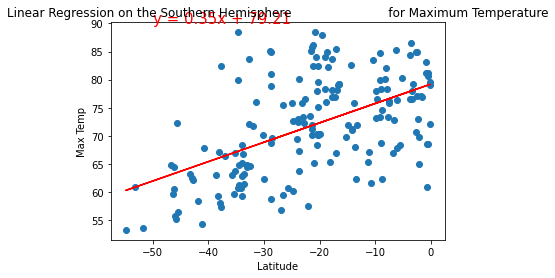

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

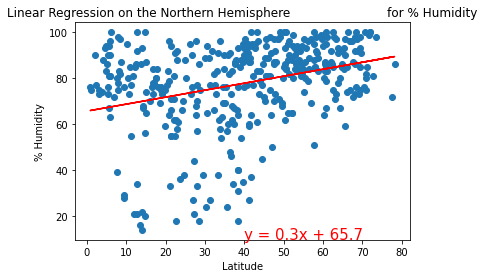

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

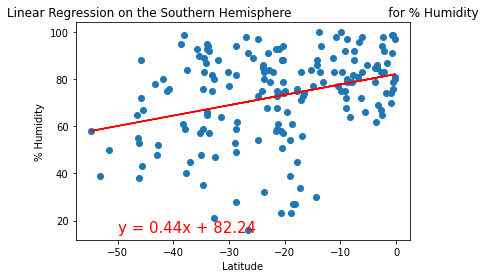

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

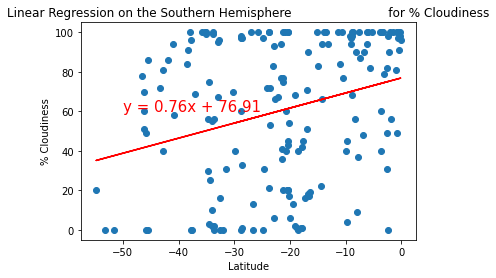

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

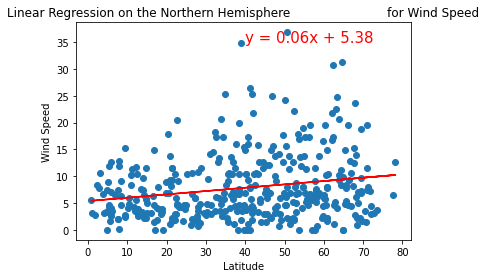

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

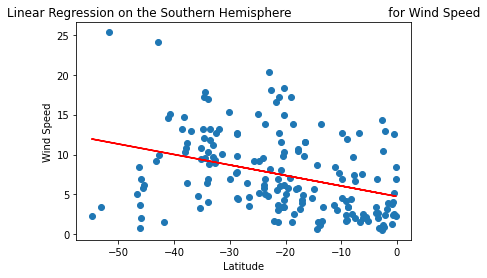

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))